# 일반 심전도 신호 분석

분석을 진행하기 위해 전처리 진행
1. Bandpass filtering 	0.1–100 Hz
2. sampling 360Hz 

In [46]:
#import packages
import heartpy as hp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import resample

fs = 500.0
global result_df
result_df = None

# Analysis

In [204]:
def analysis(index,prototype):
    global result_df

    #파일 경로 입력
    file = "./ECG/S"+index+"/S"+index+"_ECG_"+prototype+".csv"
    file_ =pd.read_csv(file)
    data = file_["Num1"]
    
    #banpass filltering
    # filtered = hp.filter_signal(data, cutoff = [0.1,100], sample_rate = fs, filtertype='bandpass')
    # filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = fs, filtertype='notch')
    filtered = hp.remove_baseline_wander(data, fs)

    #resample the data. 
    # Usually 2, 4, or 6 times is enough depending on original sampling rate
    # resampled_data = resample(filtered, len(filtered) * 2)

    #And run the analysis again. Don't forget to up the sample rate as well!
    working_data, m = hp.process(hp.scale_data(filtered), fs,calc_freq=True)

    # try:
    #     print("remove_baseline_wander")
    #     filtered = hp.remove_baseline_wander(data, fs)
    #     working_data, m = hp.process(hp.scale_data(filtered), fs,calc_freq=True)
    # if index == "3":
    #     print("bandpass")
    #     filtered = hp.filter_signal(data, cutoff = [0.1,100], sample_rate = fs, filtertype='bandpass')
    #     working_data, m = hp.process(hp.scale_data(filtered), fs,calc_freq=True)


    bpm = m['bpm']
    sdnn = m['sdnn']
    sdsd = m['sdsd']
    rmssd = m['rmssd']
    vlf = m['vlf']
    lf = m['lf']
    hf = m['hf']
    lf_hf = m['lf/hf']
    p_total = m['p_total']
    
    if index == '1':
        result = {
            'index' : [index],
            'bpm' : [bpm],
            'sdnn' : [sdnn],
            'sdsd' : [sdsd],
            'rmssd' : [rmssd],
            'vlf' : [vlf],
            'lf' : [lf],
            'hf' : [hf],
            'lf/hf' : [lf_hf],
            'p_total' : [p_total]
        }
        result_df = pd.DataFrame(result)
    else:
        result_df.loc[len(result_df)] = [index,bpm,sdnn,sdsd,rmssd,vlf,lf,hf,lf_hf, p_total]

    
    #display computed measures
    # for measure in m.keys():
    #     print('%s: %f' %(measure, m[measure]))


In [ ]:
# analysis("1","base")

# print(result_df)

In [212]:
prototype = 'CaseA'

for i in range(1,13):
    if i!= 3:
        # print(i)
        index = str(i)
        analysis(index,prototype)
    # except:
    #     i+=1
# print(result_df)

M = result_df.mean()
STD= result_df.std()
temp = {'M' : [M], 'STD' : [STD]}
data_f = pd.DataFrame(temp)

writefile = "./ECG_complete/analysis/Mean_STD_"+prototype+".csv"
data_f.to_csv(writefile,index=False)

# print(M)
# print(ST)

c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)
c:\Users\kimgayoung\AppData\Local\Programs\Python\Python

In [213]:
writefile = "./ECG_complete/analysis/"+prototype+".csv"
result_df.to_csv(writefile,index=False)
print(result_df)

   index         bpm        sdnn       sdsd      rmssd          vlf  \
0      1   88.732192   56.369975  15.291666  23.252584  2044.924815   
1      2   96.745675   59.920888  22.205145  27.764545   894.995669   
2      4   88.078311   87.332526  62.649120  76.298046   608.398542   
3      5   88.427198   58.226849  52.125876  62.516741   109.729788   
4      6   92.760340   44.400883  14.250264  23.097802  1172.415408   
5      7   98.328185   49.187024  11.698274  16.639511  1441.654621   
6      8   95.455405   66.681765  26.660677  40.587680   879.060685   
7      9   86.073563   46.761111  19.947952  26.817283  1007.288087   
8     10  640.189686   61.053988  73.199639  90.742160     0.000000   
9     11  117.159734   60.302948  23.069622  26.918639  1026.386563   
10    12   99.100309  126.282378  83.539174  87.785422    90.046736   

             lf           hf     lf/hf      p_total  
0    818.247495   272.191335  3.006148  3135.363645  
1   1485.943819   393.696027  3.774343 

---

# Graph

In [150]:
def graph(index, prototype):
    file = "./ECG/S"+index+"/S"+index+"_ECG_"+prototype+".csv"
    file_ =pd.read_csv(file)
    global data
    data = file_["Num1"]
    plt.figure(figsize=(12,4))
    plt.plot(data)
    plt.show()

    #and zoom in a bit
    plt.figure(figsize=(12,4))
    plt.plot(data[0:2500])
    plt.show()

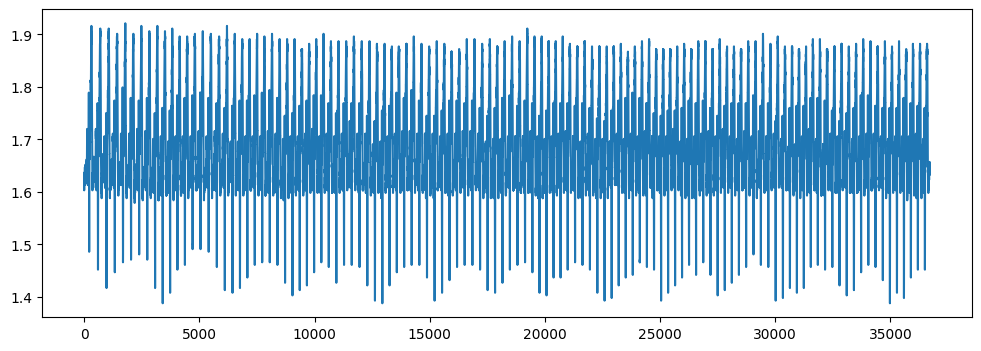

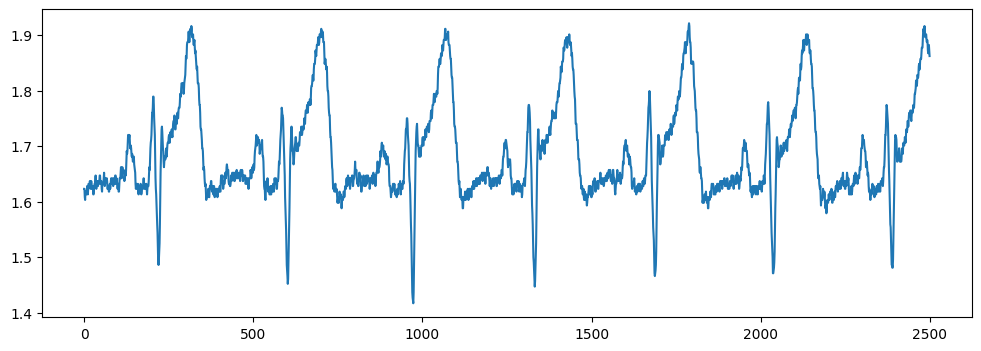

In [162]:
index_='12'
prototype_ ='base'
graph(index_,prototype_)

* filtered1 : bandpass
* filtered2 : remove_baseline_wander
* 좁은 주파수 범위(기본값: 0.05Hz) 주변에 노치 필터를 적용합니다. 이것은 기준선 방황을 제거하지만 위상 이동을 도입하지 않으며, 이는 우리의 QRS 복합체와 따라서 피크가 우리가 정확히 원하는 동일한 위치에 유지된다는 것을 의미한다.

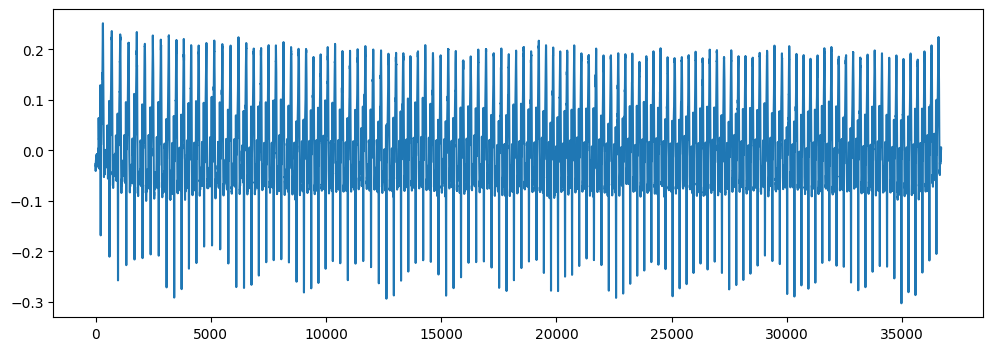

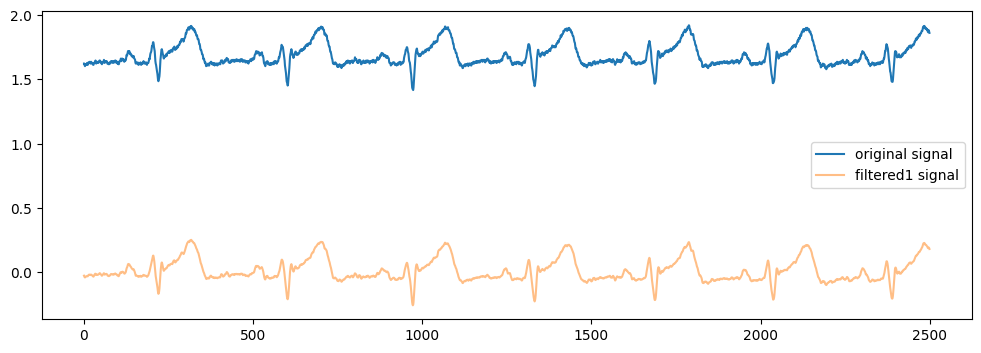

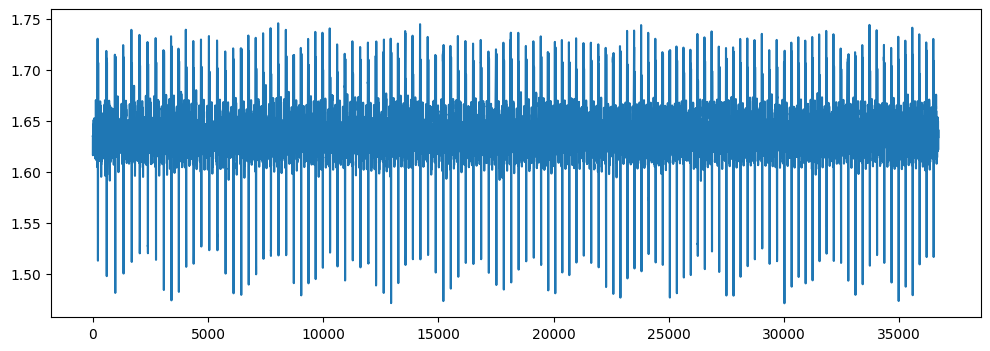

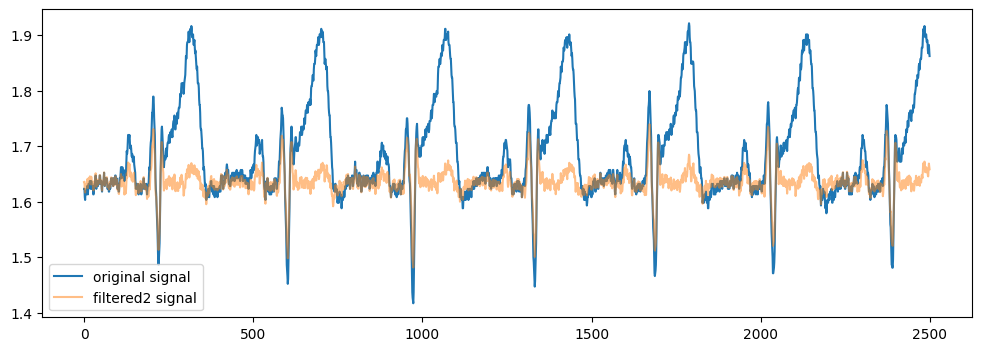

In [163]:
global filtered

filtered1 = hp.filter_signal(data, cutoff = [0.1,100], sample_rate = fs, filtertype='bandpass')
filtered2 = hp.remove_baseline_wander(data, fs)
# filtered2 = hp.filter_signal(data, cutoff = 0.05, sample_rate = fs, filtertype='notch')

#visualize again
plt.figure(figsize=(12,4))
plt.plot(filtered1)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered1[0:2500], alpha=0.5, label = 'filtered1 signal')
plt.legend()
plt.show()


plt.figure(figsize=(12,4))
plt.plot(filtered2)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered2[0:2500], alpha=0.5, label = 'filtered2 signal')
plt.legend()
plt.show()

c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)
c:\Users\kimgayoung\AppData\Local\Programs\Python\Python

   index        bpm       sdnn       sdsd      rmssd         vlf         lf  \
0      3  93.452602  32.654973  12.225189  19.575298  110.513274  72.094277   
1      3  94.827586  17.178691   3.992180   9.617692    0.000000   0.000000   

           hf     lf/hf    p_total  
0  101.510809  0.710213  284.11836  
1  134.862310  0.000000  134.86231  


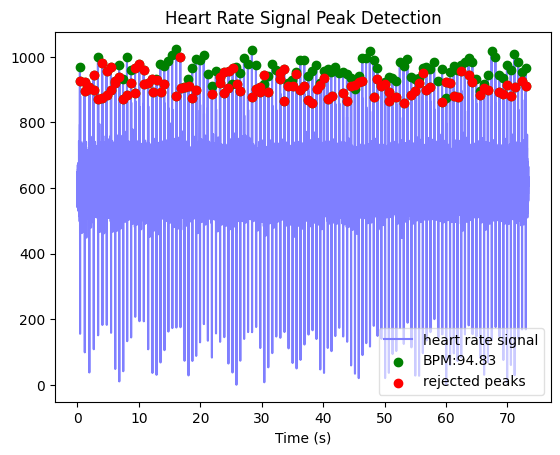

<Figure size 1200x400 with 0 Axes>

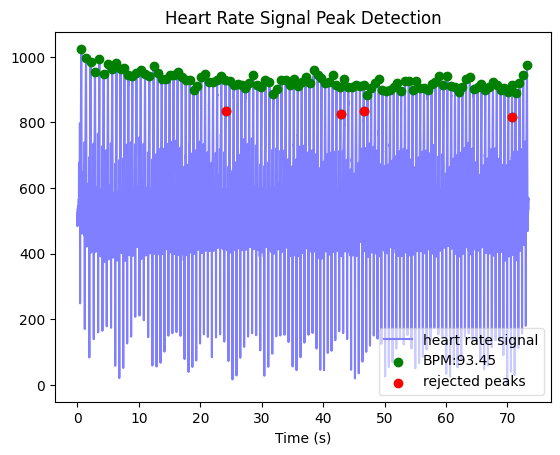

In [164]:
#run analysis
wd1, m1 = hp.process(hp.scale_data(filtered1), fs,calc_freq=True)
wd2, m2 = hp.process(hp.scale_data(filtered2), fs,calc_freq=True)
hp.plotter(wd2, m2)
#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd1, m1)


#display computed measures
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

    # bpm = m['bpm']
    # sdnn = m['sdnn']
    # sdsd = m['sdsd']
    # rmssd = m['rmssd']
    # vlf = m['vlf']
    # lf = m['lf']
    # hf = m['hf']
    # lf_hf = m['lf/hf']
    # p_total = m['p_total']
result = {
            'index' : [index,index],
            'bpm' : [m1['bpm'],m2['bpm']],
            'sdnn' : [m1['sdnn'],m2['sdnn']],
            'sdsd' : [m1['sdsd'],m2['sdsd']],
            'rmssd' : [ m1['rmssd'], m2['rmssd']],
            'vlf' : [m1['vlf'],m2['vlf']],
            'lf' : [m1['lf'],m2['lf']],
            'hf' : [m1['hf'],m2['hf']],
            'lf/hf' : [m1['lf/hf'],m2['lf/hf']],
            'p_total' : [m1['p_total'],m2['p_total']]
        }
df = pd.DataFrame(result)
print(df)

ECG는 일반적으로 매우 좁은 피크를 갖는다. 필터링은 일반적으로 최대치를 동일한 위치에 유지하지만 파형을 더 좁혀서 문제가 발생할 수 있습니다. 

HeartPy는 훨씬 더 넓은 PPG 파형을 위해 설계되었기 때문에 업샘플링은 일반적으로 피크당 더 많은 데이터 포인트를 제공하기 때문에 유용합니다. 상대적 피크 위치를 이동하거나 변경하지 않습니다.

ECG로 작업하는 경우 필터가 필요한 경우 짝수 계수를 사용하여 업샘플링하는 것이 좋습니다. 일반적으로 4-10 사이의 요인이면 충분합니다.

   index        bpm       sdnn       sdsd      rmssd         vlf          lf  \
0      3  40.661977  61.869084  32.653337  67.785289  416.556585  640.693740   
1      3  40.650941  60.883141  31.233349  66.272462  603.376695  594.259574   

            hf     lf/hf      p_total  
0  1635.612480  0.391715  2692.862805  
1  1490.550454  0.398685  2688.186723  


c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)
c:\Users\kimgayoung\AppData\Local\Programs\Python\Python

<Figure size 1200x400 with 0 Axes>

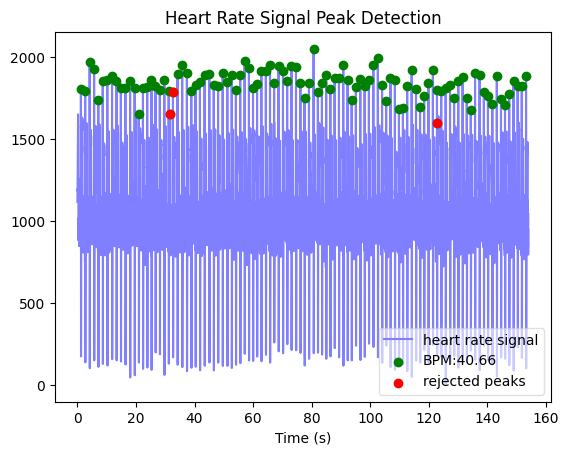

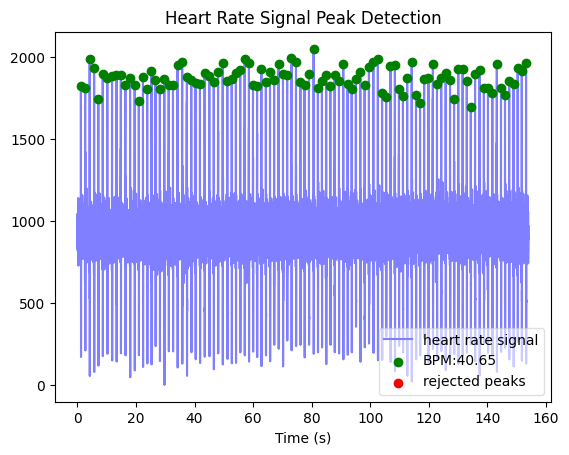

In [149]:
from scipy.signal import resample
num = 2
#resample the data. Usually 2, 4, or 6 times is enough depending on original sampling rate
resampled_data1 = resample(filtered1, len(filtered1) * num)
resampled_data2 = resample(filtered2, len(filtered2) * num)

wd1, m1 = hp.process(hp.scale_data(resampled_data1)* num, fs,calc_freq=True)
wd2, m2 = hp.process(hp.scale_data(resampled_data2)* num, fs,calc_freq=True)
#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd1, m1)
hp.plotter(wd2, m2)

#display computed measures
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

    # bpm = m['bpm']
    # sdnn = m['sdnn']
    # sdsd = m['sdsd']
    # rmssd = m['rmssd']
    # vlf = m['vlf']
    # lf = m['lf']
    # hf = m['hf']
    # lf_hf = m['lf/hf']
    # p_total = m['p_total']
result = {
            'index' : [index,index],
            'bpm' : [m1['bpm'],m2['bpm']],
            'sdnn' : [m1['sdnn'],m2['sdnn']],
            'sdsd' : [m1['sdsd'],m2['sdsd']],
            'rmssd' : [ m1['rmssd'], m2['rmssd']],
            'vlf' : [m1['vlf'],m2['vlf']],
            'lf' : [m1['lf'],m2['lf']],
            'hf' : [m1['hf'],m2['hf']],
            'lf/hf' : [m1['lf/hf'],m2['lf/hf']],
            'p_total' : [m1['p_total'],m2['p_total']]
        }
df = pd.DataFrame(result)
print(df)

---
분석 진행

In [ ]:
def analysis(index,prototype):
    global result_df

    file = "./ECG/S"+index+"/S"+index+"_ECG_"+prototype+".csv"
    file_ =pd.read_csv(file)
    data = file_["Num1"]
    
    # data_filtering = hp.filter_signal(data,cutoff = [0.75, 3.5], sample_rate = fs,order = 3, filtertype='bandpass')
    # data_filtering =   hp.filter_signal(data, cutoff = 0.05, sample_rate = fs, filtertype='notch')
    filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = fs, filtertype='notch')
    working_data, measures = hp.process(hp.scale_data(filtered), fs, calc_freq=True)
   
    
    working_data, measures = hp.process(data.values, fs, calc_freq=True)
    bpm = measures['bpm']
    rmssd = measures['rmssd']
    lf_hf = measures['lf/hf']
    sdnn = measures['sdnn']

    if index == '1':
        result = {
            'index' : [index],
            'bpm' : [bpm],
            'rmssd' : [rmssd],
            'lf/hf' : [lf_hf],
            'sdnn' : [sdnn]
        }
        result_df = pd.DataFrame(result)
    else:
        result_df.loc[len(result_df)] = [index,bpm, rmssd, lf_hf, sdnn]

 


In [ ]:
for i in range(1,13):
    
    try:
        print(i)
        index = str(i)
        analysis(index,"CaseB")
    except:
        i+=1
print(result_df)

* 신호에 감지 가능한 심박수 없음
* 매우 노이즈가 많은 신호(무선 필터링 및 스케일링)
* 신호에 심박수 데이터가 포함되어 있으면 먼저 필터링 및/또는 스케일링을 고려하십시오.
#analysis("5","base") 
#analysis("10","base")
---
#analysis("3","CaseA")
#analysis("4","CaseA")
#analysis("5","CaseA")
#analysis("10","CaseA")
---
#analysis("3","CaseB")
#analysis("5","CaseB")
#analysis("10","CaseB")
#analysis("12","CaseB")